Задача: по 38 признакам, связанных с заявкой на грант (область исследований учёных, информация по их академическому бэкграунду, размер гранта, область, в которой он выдаётся) предсказать, будет ли заявка принята. Датасет включает в себя информацию по 6000 заявкам на гранты, которые были поданы в университете Мельбурна в период с 2004 по 2008 год.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('D:\DATA\clas_data.csv')

In [3]:
data.shape

(6000, 39)

In [4]:
data

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,21A,50A,NaN,430102.0,50.0,440207.0,30.0,379999.0,20.0,...,653.0,7.0,Yes,>=0 to 5,2.0,0.0,1.0,1.0,0.0,0.0
5996,1,163C,10A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0
5997,1,112D,30C,A,321204.0,40.0,321208.0,40.0,321210.0,20.0,...,2523.0,25.0,Yes,>10 to 15,3.0,3.0,2.0,2.0,2.0,5.0
5998,1,NaN,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,...,1798.0,118.0,NaN,Less than 0,0.0,0.0,0.0,0.0,1.0,2.0


Выделю целевую переменную и обозначу её за Y,
а все остальные - за X

In [18]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']
print(X.shape, Y.shape)

(6000, 38) (6000,)


### Предобработка данных

In [19]:
pd.isnull(data).any()

Grant.Status                              False
Sponsor.Code                               True
Grant.Category.Code                        True
Contract.Value.Band...see.note.A           True
RFCD.Code.1                                True
RFCD.Percentage.1                          True
RFCD.Code.2                                True
RFCD.Percentage.2                          True
RFCD.Code.3                                True
RFCD.Percentage.3                          True
RFCD.Code.4                                True
RFCD.Percentage.4                          True
RFCD.Code.5                                True
RFCD.Percentage.5                          True
SEO.Code.1                                 True
SEO.Percentage.1                           True
SEO.Code.2                                 True
SEO.Percentage.2                           True
SEO.Code.3                                 True
SEO.Percentage.3                           True
SEO.Code.4                              

### 
Очень много пропущенных значений.
Просто удалим их

In [20]:
data.dropna().shape

(213, 39)

Удалились почти все данные, следовательно, такой метод решения проблемы не подходит
Пропущенные значения можно так же интерпретировать, для этого существует несколько способов, они различаются для категориальных и вещественных признаков.

Для вещественных признаков:
1) заменить на 0

2) заменить на среднее

Для категориальных:
1) интерпретировать пропущенное значение, как ещё одну категорию

### Обработка пропущенных значений

Получим все столбцы с вещественными значениями и категориальными

In [21]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

Сделаем обработку

In [22]:
#Заполнение нулями пропущенных вещественных признаков
X_real_zeros = X[numeric_cols].fillna(0)
print(X_real_zeros.shape)
X_real_zeros.head()

(6000, 13)


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
0,50.0,30.0,20.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,2.0,0.0
1,100.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,1965.0,3.0,1.0
2,50.0,30.0,20.0,0.0,0.0,60.0,20.0,20.0,0.0,0.0,1955.0,1.0,5.0
3,60.0,40.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,0.0,1950.0,2.0,1.0
4,100.0,0.0,0.0,0.0,0.0,50.0,50.0,0.0,0.0,0.0,1970.0,0.0,2.0


In [23]:
#Высчитывает среднее в каждом из столбцов
def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        means[j] = numeric_data.iloc[:,j].mean()
    return pd.Series(means, numeric_data.columns)

In [24]:
#Заполнение срденим значением по столбцу пропущенных вещественных признаков
X_real_mean = X[numeric_cols].fillna(value=calculate_means(X[numeric_cols]))
print(X_real_mean.shape)
X_real_mean.sample(5)

(6000, 13)


,RFCD.Percentage.1,RFCD.Percentage.2,RFCD.Percentage.3,RFCD.Percentage.4,RFCD.Percentage.5,SEO.Percentage.1,SEO.Percentage.2,SEO.Percentage.3,SEO.Percentage.4,SEO.Percentage.5,Year.of.Birth.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1
906,40.000000,30.000000,30.000000,0.000000,0.000000,50.00000,30.00000,20.000000,0.000000,0.000000,1970.0,6.0,5.0
4224,50.000000,50.000000,0.000000,0.000000,0.000000,100.00000,0.00000,0.000000,0.000000,0.000000,1965.0,3.0,2.0
4257,100.000000,0.000000,0.000000,0.000000,0.000000,40.00000,30.00000,10.000000,10.000000,10.000000,1955.0,1.0,3.0
5248,100.000000,0.000000,0.000000,0.000000,0.000000,50.00000,25.00000,25.000000,0.000000,0.000000,1970.0,1.0,5.0
3632,74.832348,17.677593,6.933011,0.437937,0.119112,71.48324,20.64688,6.926704,0.730804,0.212192,1975.0,1.0,0.0


In [25]:
#Преобразуем в столбцах с категориальными признаками NaN в строчный тип
X_cat = X[categorical_cols].fillna('NaN').astype(str)
print(X_cat.shape)
X_cat.sample(5)

(6000, 25)


,RFCD.Code.1,SEO.Code.2,Person.ID.1,RFCD.Code.5,Faculty.No..1,RFCD.Code.2,Role.1,Home.Language.1,SEO.Code.3,SEO.Code.5,...,C.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Country.of.Birth.1,A.1,Contract.Value.Band...see.note.A,RFCD.Code.3,SEO.Code.1,Grant.Category.Code,RFCD.Code.4,Dept.No..1
5302,440104.0,750404.0,43597.0,0.0,7.0,440109.0,CHIEF_INVESTIGATOR,NaN,0.0,0.0,...,5.0,Less than 0,South Africa,18.0,C,0.0,750403.0,10A,0.0,803.0
1447,300204.0,0.0,12917.0,0.0,1.0,0.0,PRINCIPAL_SUPERVISOR,NaN,0.0,0.0,...,0.0,Less than 0,Australia,4.0,A,0.0,620105.0,10A,0.0,1038.0
469,250302.0,730106.0,71127.0,270101.0,25.0,249901.0,CHIEF_INVESTIGATOR,NaN,740301.0,0.0,...,0.0,Less than 0,Australia,0.0,A,250502.0,780105.0,50A,270199.0,2603.0
429,291104.0,0.0,125287.0,0.0,19.0,340201.0,CHIEF_INVESTIGATOR,NaN,0.0,0.0,...,0.0,>=0 to 5,Australia,0.0,G,300902.0,770502.0,30B,0.0,2103.0
627,321017.0,730204.0,1862.0,0.0,25.0,0.0,CHIEF_INVESTIGATOR,NaN,0.0,0.0,...,26.0,>10 to 15,Great Britain,4.0,D,0.0,730104.0,10A,0.0,2853.0


### Преобразование категориальных признаков.

Для использования модели регрессии требуется преобразовать категориальные признаки в вещественные.Основной способ преоборазования категориальных признаков в вещественные: one-hot encoding. Его идея заключается в том, что мы преобразуем категориальный признак при помощи бинарного кода: каждой категории ставим в соответствие набор из нулей и единиц.

Посмотрим, как данный метод работает на простом наборе данных.

In [26]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

      sex nationality
0    male    American
1  female    European
2    male       Asian
3  female    European

Закодированные данные:

[[1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0.]]


Как видно, в первые три колонки оказалась закодированна информация о стране, а во вторые две - о поле. При этом для совпадающих элементов выборки строки будут полностью совпадать. Также из примера видно, что кодирование признаков сильно увеличивает их количество, но полностью сохраняет информацию, в том числе о наличии пропущенных значений (их наличие просто становится одним из бинарных признаков в преобразованных данных).

Теперь применим one-hot encoding к категориальным признакам из исходного датасета. Обратите внимание на общий для всех методов преобработки данных интерфейс. Функция

    encoder.fit_transform(X)
    
позволяет вычислить необходимые параметры преобразования, впоследствии к новым данным можно уже применять функцию

    encoder.transform(X)
    
Очень важно применять одинаковое преобразование как к обучающим, так и тестовым данным, потому что в противном случае вы получите непредсказуемые, и, скорее всего, плохие результаты. В частности, если вы отдельно закодируете обучающую и тестовую выборку, то получите вообще говоря разные коды для одних и тех же признаков, и ваше решение работать не будет.

Также параметры многих преобразований нельзя вычислять одновременно на данных из обучения и теста, потому что иначе подсчитанные на тесте метрики качества будут давать смещённые оценки на качество работы алгоритма. Кодирование категориальных признаков не считает на обучающей выборке никаких параметров, поэтому его можно применять сразу к всему датасету.

In [27]:
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat.T.to_dict().values())

Для построения метрики качества по результату обучения требуется разделить исходный датасет на обучающую и тестовую выборки.

In [28]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

print(y_train.shape)
print(y_test.shape)
print(X_train_real_zeros.shape)
print(X_test_real_zeros.shape)
print(X_train_cat_oh.shape)
print(X_test_cat_oh.shape)

(4200,)
(1800,)
(4200, 13)
(1800, 13)
(4200, 5593)
(1800, 5593)


Итак, мы получили первые наборы данных, для которых выполнены оба ограничения логистической регрессии на входные данные. Обучим на них регрессию, используя имеющийся в библиотеке sklearn функционал по подбору гиперпараметров модели
    
    optimizer = GridSearchCV(estimator, param_grid)

где:
- estimator - обучающий алгоритм, для которого будет производиться подбор параметров
- param_grid - словарь параметров, ключами которого являются строки-названия, которые передаются алгоритму estimator, а значения - набор параметров для перебора

Данный класс выполняет кросс-валидацию обучающей выборки для каждого набора параметров и находит те, на которых алгоритм работает лучше всего. Этот метод позволяет настраивать гиперпараметры по обучающей выборке, избегая переобучения.

- scoring - функционал качества, максимум которого ищется кросс валидацией, по умолчанию используется функция score() класса esimator
- n_jobs - позволяет ускорить кросс-валидацию, выполняя её параллельно, число определяет количество одновременно запущенных задач
- cv - количество фолдов, на которые разбивается выборка при кросс-валидации

После инициализации класса GridSearchCV, процесс подбора параметров запускается следующим методом:

    optimizer.fit(X, y)
    
На выходе для получения предсказаний можно пользоваться функцией

    optimizer.predict(X)
    
для меток или

    optimizer.predict_proba(X)
    
для вероятностей (в случае использования логистической регрессии).
    
Также можно напрямую получить оптимальный класс estimator и оптимальные параметры, так как они является атрибутами класса GridSearchCV:
- best\_estimator\_ - лучший алгоритм
- best\_params\_ - лучший набор параметров

### Сравнение способов заполнения вещественных пропущенных значений.

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score


def plot_scores(optimizer):
    scores=[]
    for i in range(len(optimizer.cv_results_['params'])):
        scores.append([optimizer.cv_results_['params'][i]['C'], 
                optimizer.cv_results_['mean_test_score'][i],
                optimizer.cv_results_['std_test_score'][i]])
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))

In [30]:
#Стак вещественных и категориальных признаков
X_train_zeros = np.hstack( (X_train_real_zeros, X_train_cat_oh) )
X_train_mean = np.hstack( (X_train_real_mean, X_train_cat_oh) )
X_test_zeros = np.hstack( (X_test_real_zeros, X_test_cat_oh) )
X_test_mean = np.hstack( (X_test_real_mean, X_test_cat_oh) )

In [31]:
#GridSearchCV parameters
parameters_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cross_validation = StratifiedKFold(n_splits=4, shuffle=True, random_state = 0)
estimator = LogisticRegression(solver='liblinear')

In [32]:
%%time
#GridSearchCV заполненный нулями
optimizer_zeros = GridSearchCV(estimator, parameters_grid, cv=cross_validation)
optimizer_zeros.fit(X_train_zeros, y_train)

Wall time: 10 s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [34]:
%%time
#GridSearchCV заполненный средними
optimizer_mean = GridSearchCV(estimator, parameters_grid, cv=cross_validation)
optimizer_mean.fit(X_train_mean, y_train)

Wall time: 8.46 s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

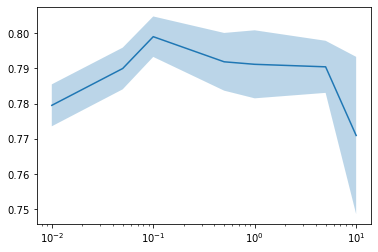

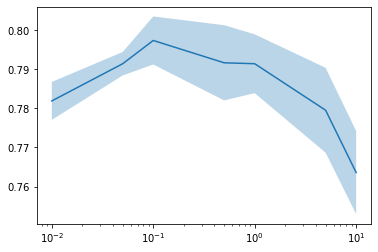

In [35]:
plot_scores(optimizer_zeros)
plot_scores(optimizer_mean)

In [36]:
#GridSearchCV c нулями
print('Best parameter for GridSearchCV with zero fillna', optimizer_zeros.best_params_)
roc_auc_score_zeros = roc_auc_score(y_test, optimizer_zeros.best_estimator_.predict_proba(X_test_zeros)[:, 1])
print('roc_auc_score_zeros', roc_auc_score_zeros)
#GridSearchCV with mean fillna
print('Best parameter for GridSearchCV with mean fillna', optimizer_mean.best_params_)
roc_auc_score_mean = roc_auc_score(y_test, optimizer_mean.best_estimator_.predict_proba(X_test_mean)[:, 1])
print('roc_auc_score_mean', roc_auc_score_mean)

write_answer_1(roc_auc_score_zeros, roc_auc_score_mean)

Best parameter for GridSearchCV with zero fillna {'C': 0.1}
roc_auc_score_zeros 0.8868126129894043
Best parameter for GridSearchCV with mean fillna {'C': 0.1}
roc_auc_score_mean 0.8879930854506152


Далее будем использовать модель, у которой пропуски заполнены нулями,
так как её оценка лучше

### Масштабирование вещественных признаков.

Попробуем как-то улучшить качество классификации. Для этого посмотрим на сами данные:

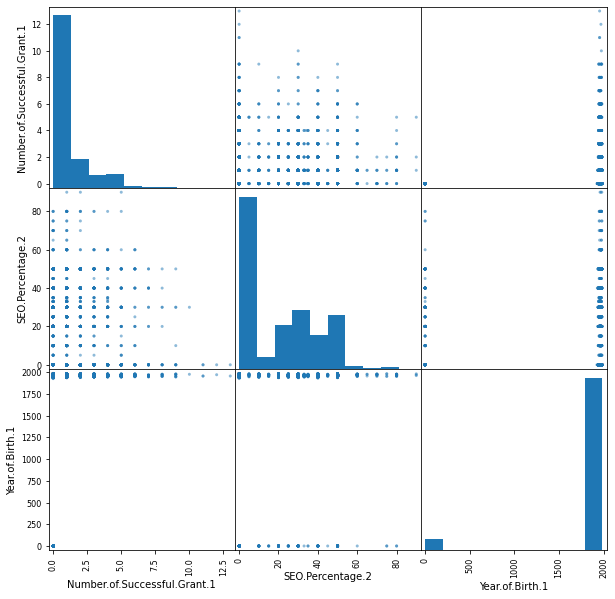

In [38]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, разные признаки очень сильно отличаются друг от друга по модулю значений. В случае обычной регрессии это никак не влияет на качество обучаемой модели, т.к. у меньших по модулю признаков будут большие веса, но при использовании регуляризации, которая штрафует модель за большие веса, регрессия, как правило, начинает работать хуже.

В таких случаях всегда рекомендуется делать стандартизацию (масштабирование) признаков, для того чтобы они меньше отличались друг друга по модулю, но при этом не нарушались никакие другие свойства признакового пространства. При этом даже если итоговое качество модели на тесте уменьшается, это повышает её интерпретабельность, потому что новые веса имеют смысл "значимости" данного признака для итоговой классификации.

Стандартизация осуществляется посредством вычета из каждого признака среднего значения и нормировки на выборочное стандартное отклонение:

$$ x^{scaled}_{id} = \dfrac{x_{id} - \mu_d}{\sigma_d}, \quad \mu_d = \frac{1}{N} \sum_{i=1}^l x_{id}, \quad \sigma_d = \sqrt{\frac{1}{N-1} \sum_{i=1}^l (x_{id} - \mu_d)^2} $$

1. По аналогии с вызовом one-hot encoder примените масштабирование вещественных признаков для обучающих и тестовых выборок X_train_real_zeros и X_test_real_zeros, используя класс 

        StandardScaler
   
   и методы 

        StandardScaler.fit_transform(...)
        StandardScaler.transform(...)

In [39]:
from sklearn.preprocessing import StandardScaler

encoder = StandardScaler()

X_train_real_scaled = encoder.fit_transform(X_train_real_zeros)
X_test_real_scaled = encoder.fit_transform(X_test_real_zeros)

### Сравнение признаковых пространств.

Построим такие же графики для преобразованных данных:

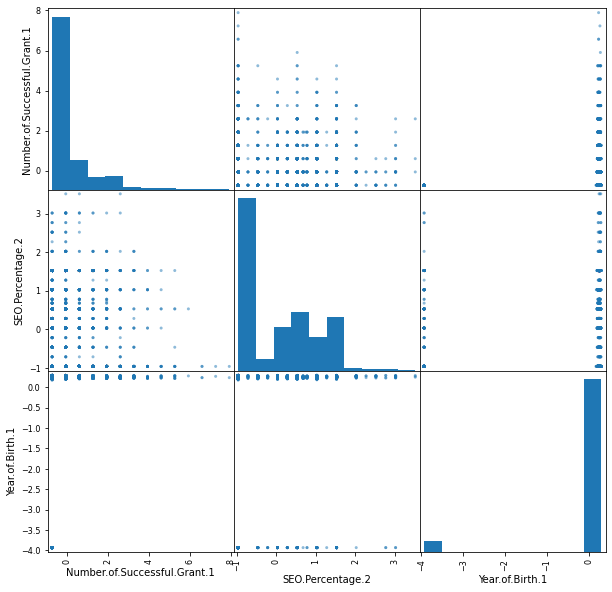

In [40]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

Как видно из графиков, мы не поменяли свойства признакового пространства: гистограммы распределений значений признаков, как и их scatter-plots, выглядят так же, как и до нормировки, но при этом все значения теперь находятся примерно в одном диапазоне, тем самым повышая интерпретабельность результатов, а также лучше сочетаясь с идеологией регуляризации.

### Сравнение качества классификации до и после масштабирования вещественных признаков.

In [41]:
def write_answer_2(auc):
    with open("preprocessing_lr_answer2.txt", "w") as fout:
        fout.write(str(auc))

In [42]:
#Стак вещественных и категориальных признаков
X_train_scaled = np.hstack( (X_train_real_scaled, X_train_cat_oh) )
X_test_scaled = np.hstack( (X_test_real_scaled, X_test_cat_oh) )

In [43]:
%%time
#GridSearchCV
optimizer_zeros.fit(X_train_scaled, y_train)

Wall time: 5.88 s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [44]:
print('Best parameter for GridSearchCV with scaled num parameters', optimizer_zeros.best_params_)
roc_auc_score_scaled = roc_auc_score(y_test, optimizer_zeros.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print('roc_auc_score', roc_auc_score_scaled)

write_answer_2(roc_auc_score_scaled)

Best parameter for GridSearchCV with scaled num parameters {'C': 0.1}
roc_auc_score 0.8864203595615175


### Балансировка классов

Алгоритмы классификации могут быть очень чувствительны к несбалансированным классам. Рассмотрим пример с выборками, сэмплированными из двух гауссиан. Их мат. ожидания и матрицы ковариации заданы так, что истинная разделяющая поверхность должна проходить параллельно оси x. Поместим в обучающую выборку 20 объектов, сэмплированных из 1-й гауссианы, и 10 объектов из 2-й. После этого обучим на них линейную регрессию, и построим на графиках объекты и области классификации.

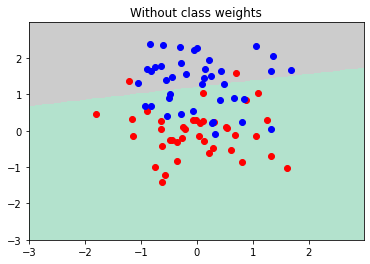

AUC: 0.911667


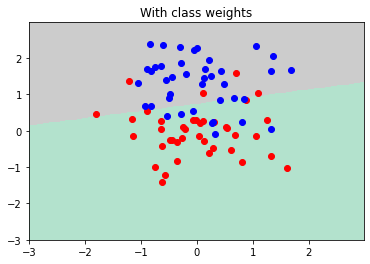

AUC: 0.906667


In [47]:
np.random.seed(0)
"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)
"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)
"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])
"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])
"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
"""Обучаем регрессию без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), parameters_grid, cv=cross_validation, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), parameters_grid, cv=cross_validation, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

Как видно, во втором случае классификатор находит разделяющую поверхность, которая ближе к истинной, т.е. меньше переобучается. Поэтому на сбалансированность классов в обучающей выборке всегда следует обращать внимание.

Посмотрим, сбалансированны ли классы в нашей обучающей выборке:

In [48]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


Видно, что нет.

Исправить ситуацию можно разными способами:
- давать объектам миноритарного класса больший вес при обучении классификатора (рассмотрен в примере выше)
- досэмплировать объекты миноритарного класса, пока число объектов в обоих классах не сравняется

### Балансировка классов.

In [49]:
def write_answer_3(auc_1, auc_2):
    auc = (auc_1 + auc_2) / 2
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(auc))

In [50]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cross_validation = StratifiedKFold(n_splits=4, shuffle=True, random_state = 0)
estimator = LogisticRegression(solver='liblinear', class_weight='balanced')

In [51]:
%%time
#GridSearchCV with balanced weights
optimizer = GridSearchCV(estimator, param_grid, cv=cross_validation)
optimizer.fit(X_train_scaled, y_train)

Wall time: 6.23 s


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})

In [52]:
print('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_bal1 = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print('roc_auc_score', roc_auc_score_bal1)

Best parameter for GridSearchCV with balanced weights {'C': 0.05}
roc_auc_score 0.8846422265145995


In [112]:
# Генерация новых индексов для класса 1
y_train_to_add = []
np.random.seed(0)
num_of_indices = np.sum(y_train==0) - np.sum(y_train==1)
indices_to_add = np.random.randint(np.sum(y_train==1)+1, size=num_of_indices)
X_train_to_add = X_train_scaled[y_train == 1,:][indices_to_add,:]

for k in indices_to_add:
    flag = True
    while flag:
        try:
            y_train_to_add.append(y_train[k])
            flag = False
        except KeyError:
            flag = True
        k += 1

y_train_to_add = pd.Series(y_train_to_add)
print(y_train_to_add.shape)
print(y_train.shape)

#new X, y train
X_train_balanced = np.vstack( (X_train_scaled, X_train_to_add) )
y_train_balanced = np.append(y_train, y_train_to_add)
print(X_train_balanced.shape, X_train_scaled.shape)
print(y_train_balanced.shape, y_train.shape)

(432,)
(4200,)
(4632, 5606) (4200, 5606)
(4632,) (4200,)


In [117]:
#GridSearchCV with balanced weights
optimizer = GridSearchCV(estimator, param_grid, cv=cross_validation)
optimizer.fit(X_train_scaled, y_train)
print(optimizer)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})


In [118]:
#GridSearchCV with balanced weights
print('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_bal2 = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print('roc_auc_score', roc_auc_score_bal2)

Best parameter for GridSearchCV with balanced weights {'C': 0.05}
roc_auc_score 0.8846422265145995


### Стратификация выборок.

Рассмотрим ещё раз пример с выборками из нормальных распределений. Посмотрим ещё раз на качество классификаторов, получаемое на тестовых выборках:

In [119]:
print('AUC ROC for classifier without weighted classes', auc_wo_class_weights)
print('AUC ROC for classifier with weighted classes: ', auc_w_class_weights)

AUC ROC for classifier without weighted classes 0.9116666666666666
AUC ROC for classifier with weighted classes:  0.9066666666666666


Насколько эти цифры реально отражают качество работы алгоритма, если учесть, что тестовая выборка так же несбалансирована, как обучающая? При этом мы уже знаем, что алгоритм логистический регрессии чувствителен к балансировке классов в обучающей выборке, т.е. в данном случае на тесте он будет давать заведомо заниженные результаты. Метрика классификатора на тесте имела бы гораздо больший смысл, если бы объекты были разделы в выборках поровну: по 20 из каждого класса на обучени и на тесте. Переформируем выборки и подсчитаем новые ошибки:

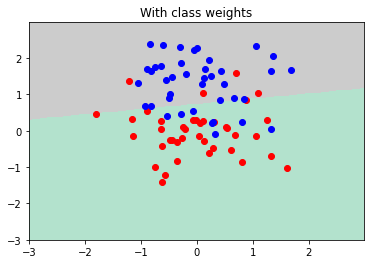

AUC ROC for stratified samples:  0.9125


In [121]:
"""Разделим данные по классам поровну между обучающей и тестовой выборками"""
example_data_train = np.vstack([data_0[:20,:], data_1[:20,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((20))])
example_data_test = np.vstack([data_0[20:,:], data_1[20:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((20))])
"""Обучим классификатор"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cross_validation, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_stratified = roc_auc_score(example_labels_test, optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC ROC for stratified samples: ', auc_stratified)

Как видно, после данной процедуры ответ классификатора изменился незначительно, а вот качество увеличилось. При этом, в зависимости от того, как вы разбили изначально данные на обучение и тест, после сбалансированного разделения выборок итоговая метрика на тесте может как увеличиться, так и уменьшиться, но доверять ей можно значительно больше, т.к. она построена с учётом специфики работы классификатора. Данный подход является частным случаем т.н. метода стратификации.

### Стратификация выборок.

In [122]:
def write_answer_4(auc):
    with open("preprocessing_lr_answer4.txt", "w") as fout:
        fout.write(str(auc))

In [124]:
(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros, y, 
                                     test_size=0.3, 
                                     random_state=0, stratify=y)
print(X_train_real_zeros.shape, X_test_real_zeros.shape, y_train.shape)

(X_train_real_mean, 
 X_test_real_mean, 
 y_train, y_test) = train_test_split(X_real_mean, y, 
                                     test_size=0.3, 
                                     random_state=0, stratify=y)

(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0, stratify=y)

(4200, 13) (1800, 13) (4200,)


In [125]:
encoder = StandardScaler()

X_train_real_scaled = encoder.fit_transform(X_train_real_zeros)
X_test_real_scaled = encoder.fit_transform(X_test_real_zeros)

#stacking numerical and categorical features
X_train_scaled = np.hstack( (X_train_real_scaled, X_train_cat_oh) )
X_test_scaled = np.hstack( (X_test_real_scaled, X_test_cat_oh) )

In [126]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3
estimator = LogisticRegression(class_weight='balanced')

In [127]:
%%time
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(X_train_scaled, y_train)
print(optimizer)

GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})
Wall time: 33.8 s


In [128]:
#GridSearchCV
print('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_strat = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_scaled)[:, 1])
print('roc_auc_score', roc_auc_score_strat)

Best parameter for GridSearchCV with balanced weights {'C': 0.1}
roc_auc_score 0.879435786823499


основные этапы предобработки данных:

    -обработка пропущенных значений
    -обработка категориальных признаков
    -стратификация
    -балансировка классов
    -масштабирование

Данные действия с данными рекомендуется проводить всякий раз, когда вы планируете использовать линейные методы. Рекомендация по выполнению многих из этих пунктов справедлива и для других методов машинного обучения.

### Трансформация признаков.

Существует достаточно много различных способов трансформации признаков, которые позволяют при помощи линейных методов получать более сложные разделяющие поверхности. Самым базовым является полиномиальное преобразование признаков. Его идея заключается в том, что помимо самих признаков вы дополнительно включаете набор все полиномы степени $p$, которые можно из них построить.

Рассмотрим принцип работы данных признаков на данных, сэмплированных их гауссиан:

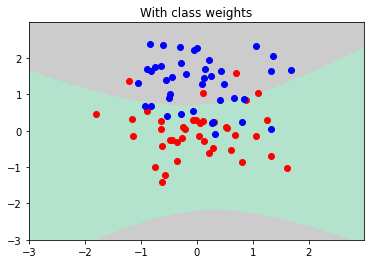

In [129]:
from sklearn.preprocessing import PolynomialFeatures

"""Инициализируем класс, который выполняет преобразование"""
transform = PolynomialFeatures(2)
"""Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
"""Обращаем внимание на параметр fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

In [130]:
print(example_data_train_poly.shape)

(40, 6)


Но при этом одновременно данный метод способствует более сильной способности модели к переобучению из-за быстрого роста числа признаком с увеличением степени $p$. Рассмотрим пример с $p=11$:

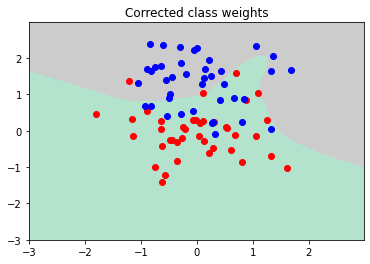

In [131]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

Количество признаков в данной модели:

In [132]:
print(example_data_train_poly.shape)

(40, 78)


### Трансформация признаков.

In [133]:
def write_answer_5(auc):
    with open("preprocessing_lr_answer5.txt", "w") as fout:
        fout.write(str(auc))

In [134]:
transform = PolynomialFeatures(2)

data_train_poly = transform.fit_transform(X_train_real_zeros)
data_test_poly = transform.transform(X_test_real_zeros)

encoder = StandardScaler()

data_train_poly_scaled = encoder.fit_transform(data_train_poly)
data_test_poly_scaled = encoder.fit_transform(data_test_poly)

#stacking numerical and categorical features
data_train_poly_full = np.hstack( (data_train_poly_scaled, X_train_cat_oh) )
data_test_poly_full = np.hstack( (data_test_poly_scaled, X_test_cat_oh) )

In [135]:
#GridSearchCV parameters
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3
estimator = LogisticRegression(class_weight='balanced', fit_intercept=False)

In [136]:
%%time
optimizer = GridSearchCV(estimator, param_grid, cv=cv)
optimizer.fit(data_train_poly_full, y_train)
print(optimizer)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          fit_intercept=False),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]})
Wall time: 34.2 s


In [137]:
#GridSearchCV
print('Best parameter for GridSearchCV with balanced weights', optimizer.best_params_)
roc_auc_score_poly = roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(data_test_poly_full)[:, 1])
print('roc_auc_score', roc_auc_score_poly)

Best parameter for GridSearchCV with balanced weights {'C': 0.1}
roc_auc_score 0.887558526015156


In [144]:
write_answer_5(roc_auc_score_poly)